In [1]:
import numpy as np
from lsst.sims.featureScheduler.utils import schema_converter
import argparse
from baselines import gen_greedy_surveys, generate_blobs
import lsst.sims.featureScheduler.detailers as detailers
from lsst.sims.featureScheduler.surveys import (generate_dd_surveys)
from lsst.sims.featureScheduler.schedulers import Core_scheduler
import matplotlib.pylab as plt
import healpy as hp
from lsst.sims.featureScheduler.modelObservatory import Model_observatory

In [2]:
filename = 'baseline_v1.3_10yrs.db'
max_indx = 230001

sc = schema_converter()

observations = sc.opsim2obs(filename)



In [3]:
nside = 32
nexp = 1
max_dither = 0.7
per_night = True

dither_detailer = detailers.Dither_detailer(per_night=per_night, max_dither=max_dither)
details = [detailers.Camera_rot_detailer(min_rot=-87., max_rot=87.), dither_detailer]
ddfs = generate_dd_surveys(nside=nside, nexp=nexp, detailers=details)
greedy = gen_greedy_surveys(nside, nexp=nexp)
blobs = generate_blobs(nside, nexp=nexp, mixed_pairs=True)
surveys = [ddfs, blobs, greedy]

scheduler = Core_scheduler(surveys, nside=nside)

for obs in observations[0:max_indx]:
    scheduler.add_observation(obs)

observatory = Model_observatory(nside=nside)
observatory.mjd = obs['mjd']
_ = observatory.observe(obs)
observatory.mjd = obs['mjd']
_ = observatory.observe(obs)

conditions = observatory.return_conditions()
scheduler.update_conditions(conditions)

/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/modelObservatory/model_observatory.py:475: RuntimeWarning: invalid value encountered in less
  slewtimes[np.where(slewtimes < 0)] = np.nan


In [4]:
scheduler.survey_lists[1][2].filtername1

# Let's get rid of the az cut for display purposes
scheduler.survey_lists[1][2].az_range =np.radians(360.)
scheduler.survey_lists[1][2].search_radius = np.radians(180.)

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


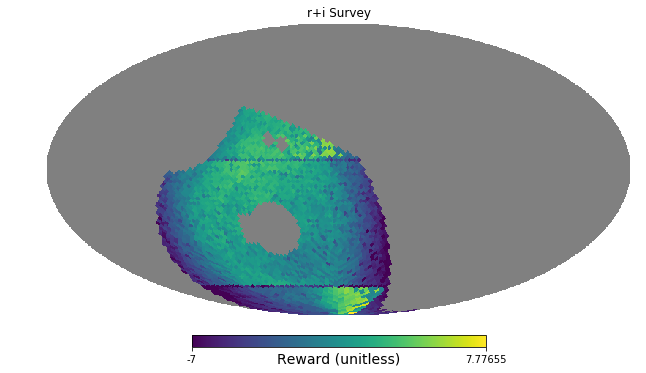

In [9]:
reward = scheduler.survey_lists[1][2].calc_reward_function(conditions)
hp.mollview(reward, title='r+i Survey', unit='Reward (unitless)', min=-7)

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


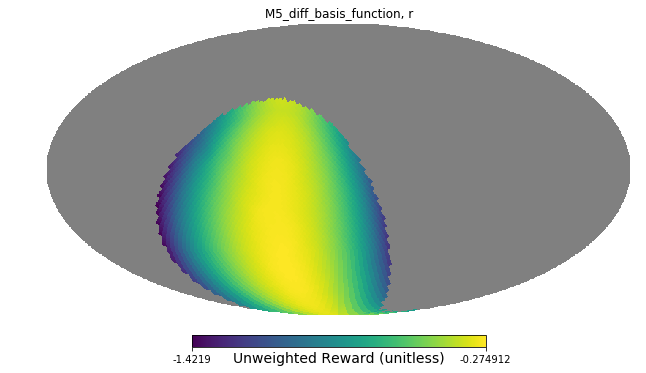

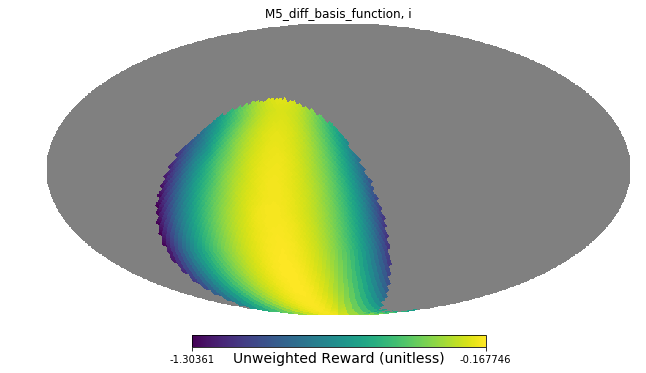

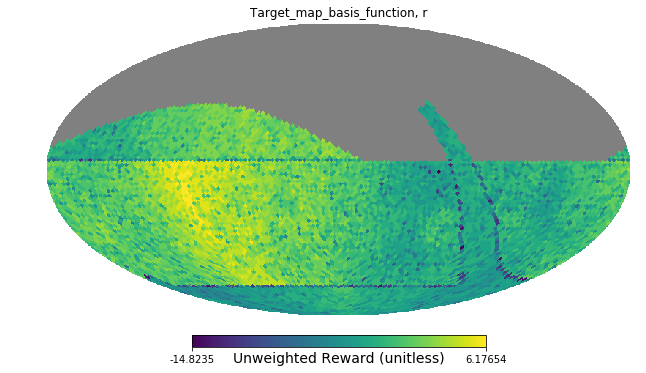

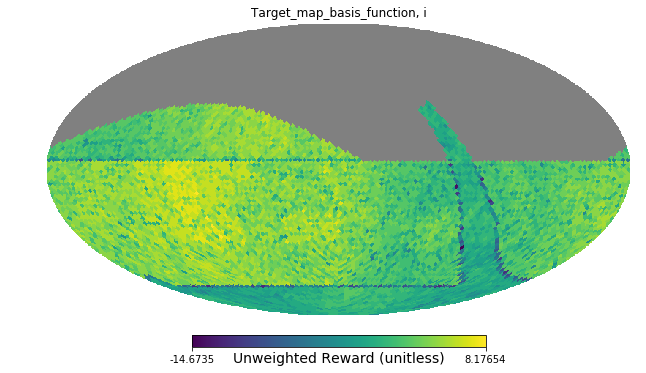

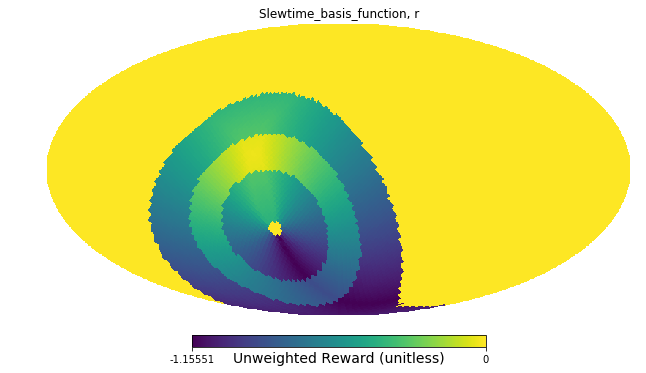

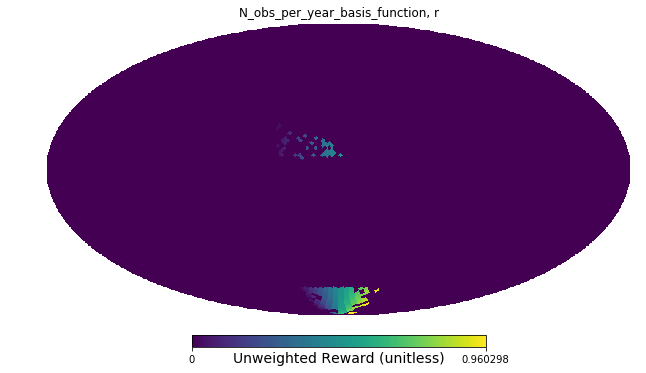

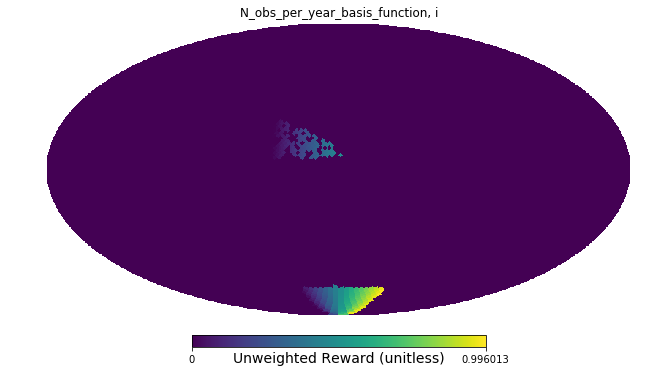

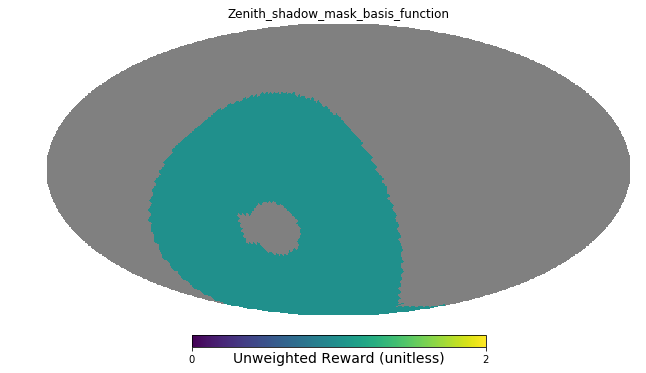

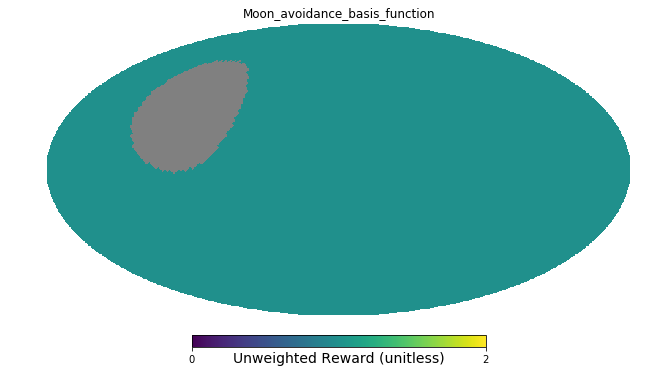

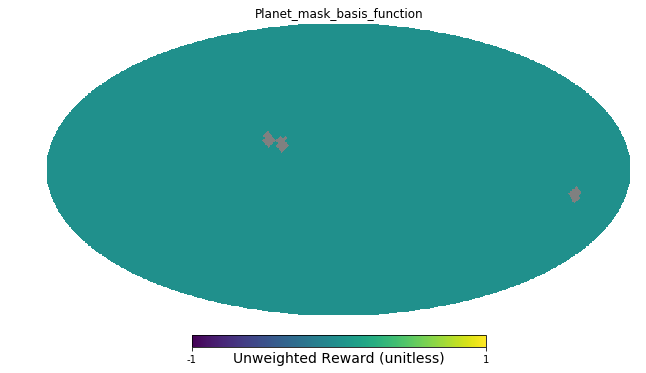

In [10]:
counter = 0
for bf in scheduler.survey_lists[1][2].basis_functions:
    bv = bf(conditions)
    if np.size(bv) > 1:
        fn = ''
        if hasattr(bf,'filtername'):
            if bf.filtername is not None:
                fn = ', '+bf.filtername
        hp.mollview(bv, title=bf.__class__.__name__+fn, unit='Unweighted Reward (unitless)')
        plt.savefig('%i_bf.pdf' % counter)
        counter += 1

In [7]:
ack = np.where(observations['note'] == 'blob, ri, a')[0]
ack[np.where(ack > 230000)]

array([ 230001,  230002,  230003, ..., 2183383, 2183384, 2183385])